# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

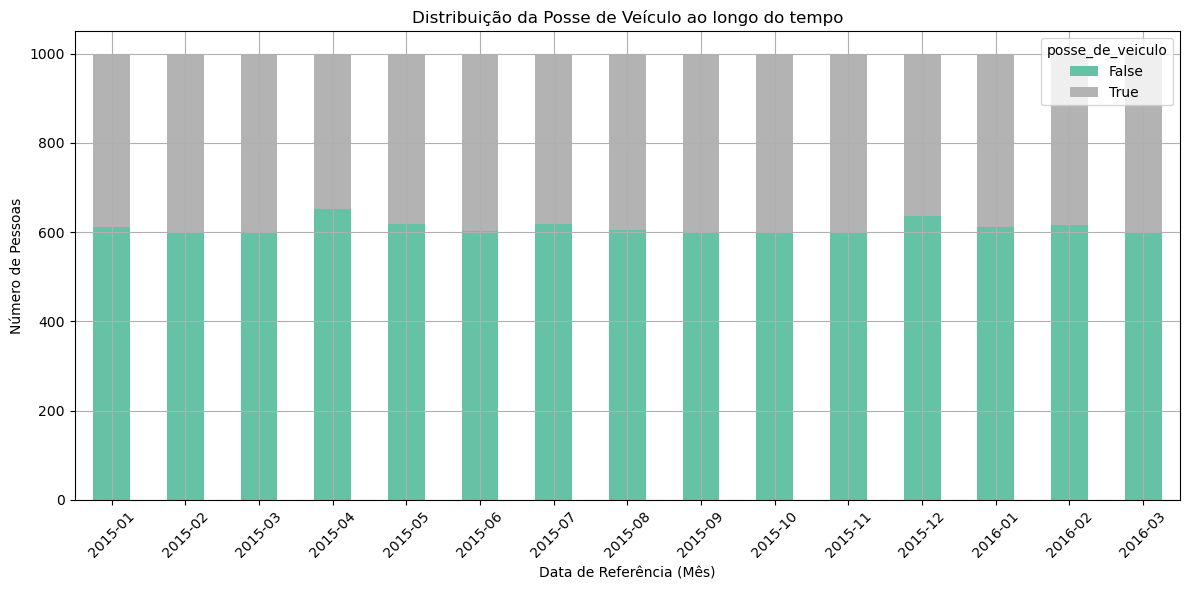

In [5]:
# Converter data_ref para datetime, se ainda não for
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Agrupar por mês e posse de veículo
df_grouped = df.groupby([df['data_ref'].dt.to_period('M'), 'posse_de_veiculo']).size().unstack()

# Plotar gráfico de barras empilhadas
df_grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Distribuição da Posse de Veículo ao longo do tempo')
plt.xlabel('Data de Referência (Mês)')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Se houver variação relevante na proporção de pessoas com e sem veículo em certos meses, isso merece investigação.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

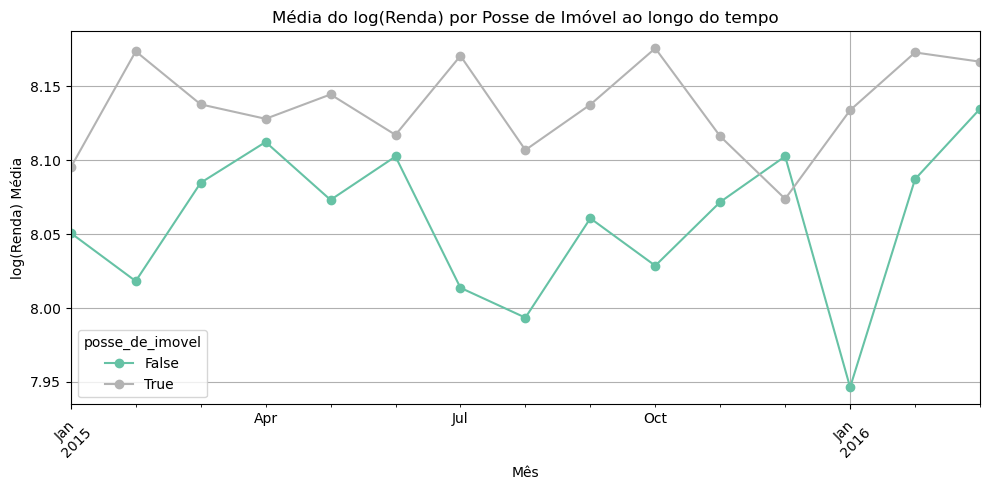

In [7]:
df['log_renda'] = np.log1p(df['renda'])  # log1p é log(1 + renda), evita problemas com zero
# Converter data_ref para datetime, se ainda não for
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Agrupar por mês e posse de imóvel
df['mes'] = df['data_ref'].dt.to_period('M')
media_imovel = df.groupby(['mes', 'posse_de_imovel'])['log_renda'].mean().unstack()

# Plotar
media_imovel.plot(figsize=(10,5), marker='o', colormap='Set2')
plt.title('Média do log(Renda) por Posse de Imóvel ao longo do tempo')
plt.ylabel('log(Renda) Média')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


O gráfico mostra que a variável posse_de_imovel tem impacto na média de log_renda ao longo do tempo, isso indica que essa variável pode ser importante para modelagem. O uso do log em renda é apropriado para melhorar a modelagem.